## File size

#### command
```bash
ls -lh > Data.txt
```

#### result
```
total 48K
┌─────────────┬────────┬────────────┬────────────┬──────────┬────────────┬───────────────┐
│ Права       │ Ссылки │ Владелец   │ Группа     │ Размер   │ Дата       │ Имя           │
├─────────────┼────────┼────────────┼────────────┼──────────┼────────────┼───────────────┤
│ -rw-rw-rw-  │ 1      │ codespace  │ codespace  │ 0        │ Sep 22     │ Data.txt      │
│ -rwxrwxrwx  │ 1      │ codespace  │ codespace  │ 16K      │ Sep 22     │ Display       │
│ -rw-r--r--  │ 1      │ codespace  │ codespace  │ 1.7K     │ Sep 19     │ Display.asm   │
│ -rw-rw-rw-  │ 1      │ codespace  │ codespace  │ 483      │ Sep 22     │ Display.c     │
│ -rwxrwxrwx  │ 1      │ codespace  │ codespace  │ 8.8K     │ Sep 22     │ Display32     │
│ -rw-rw-rw-  │ 1      │ codespace  │ codespace  │ 9.0K     │ Sep 22     │ Display32.asm │
└─────────────┴────────┴────────────┴────────────┴──────────┴────────────┴───────────────┘

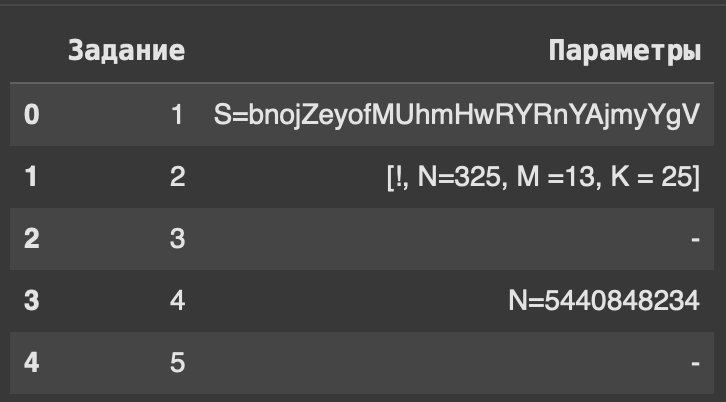

## Assebler code test

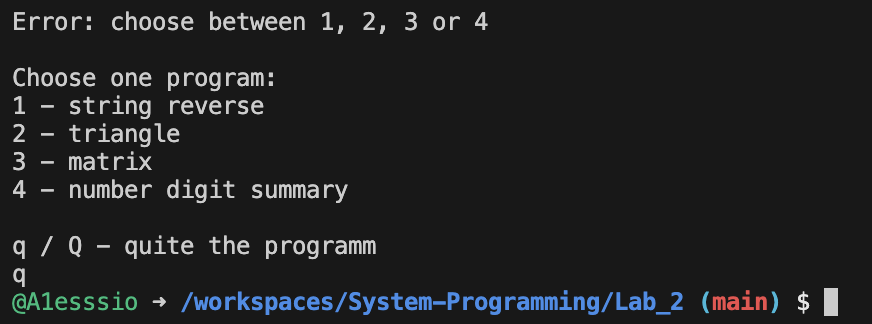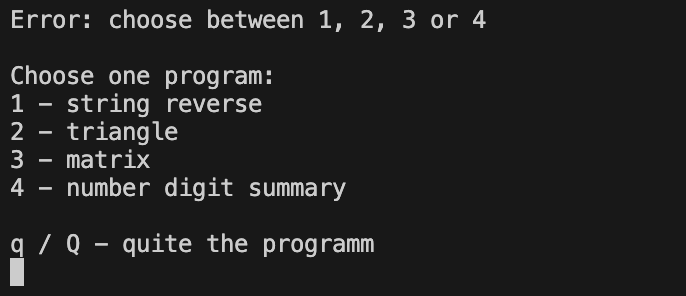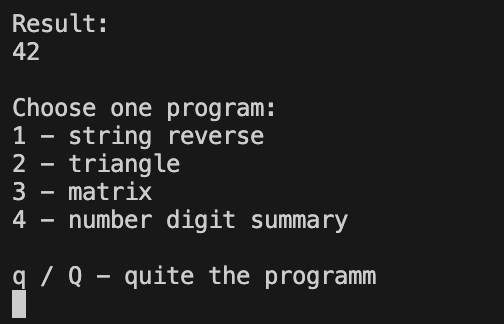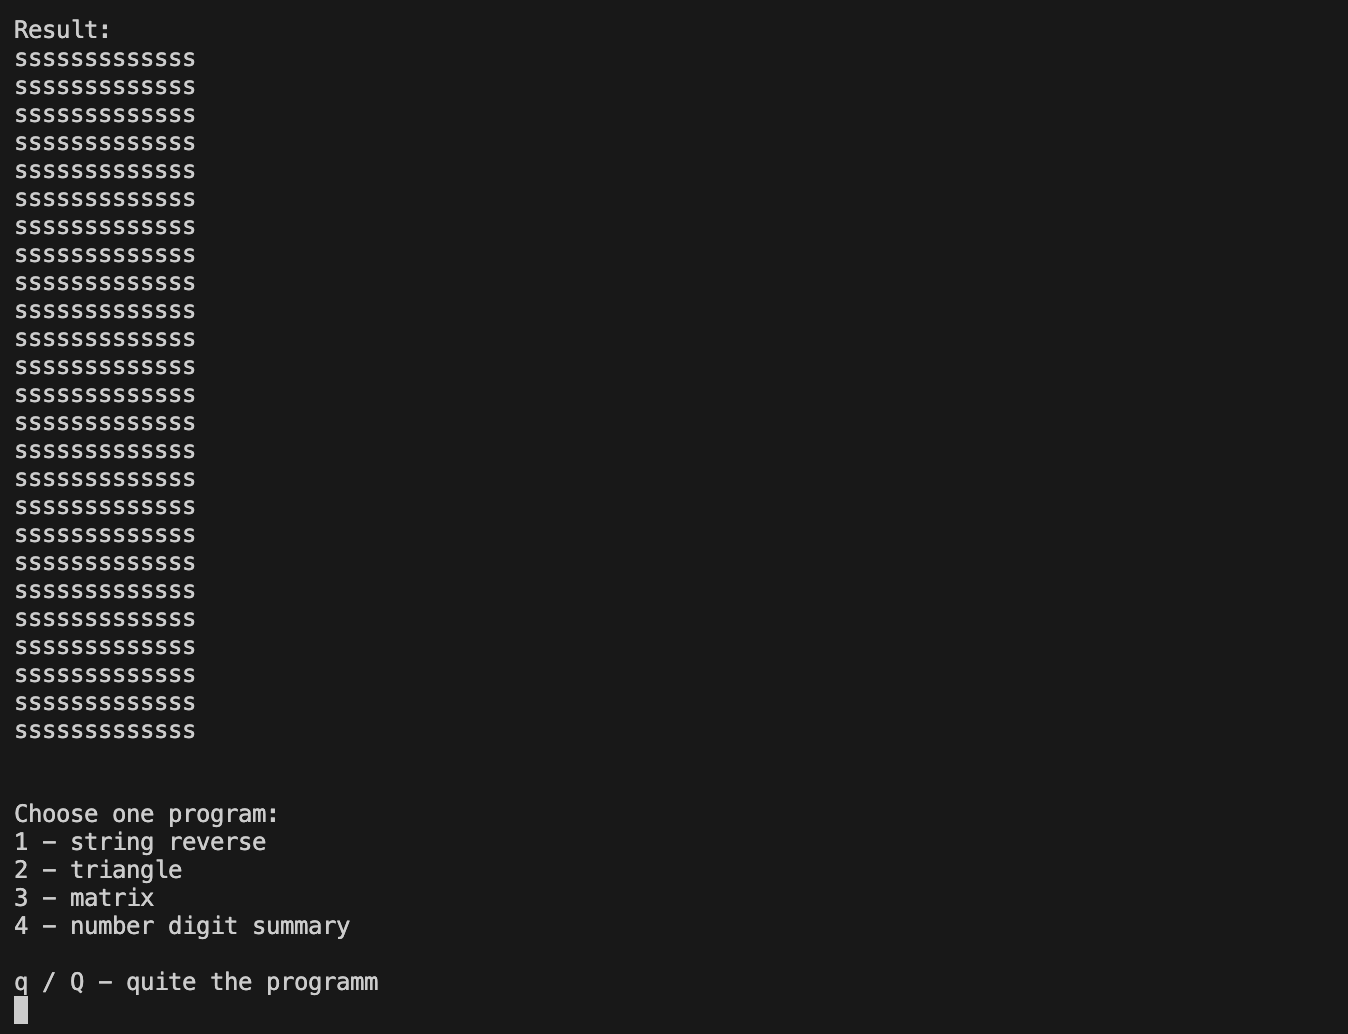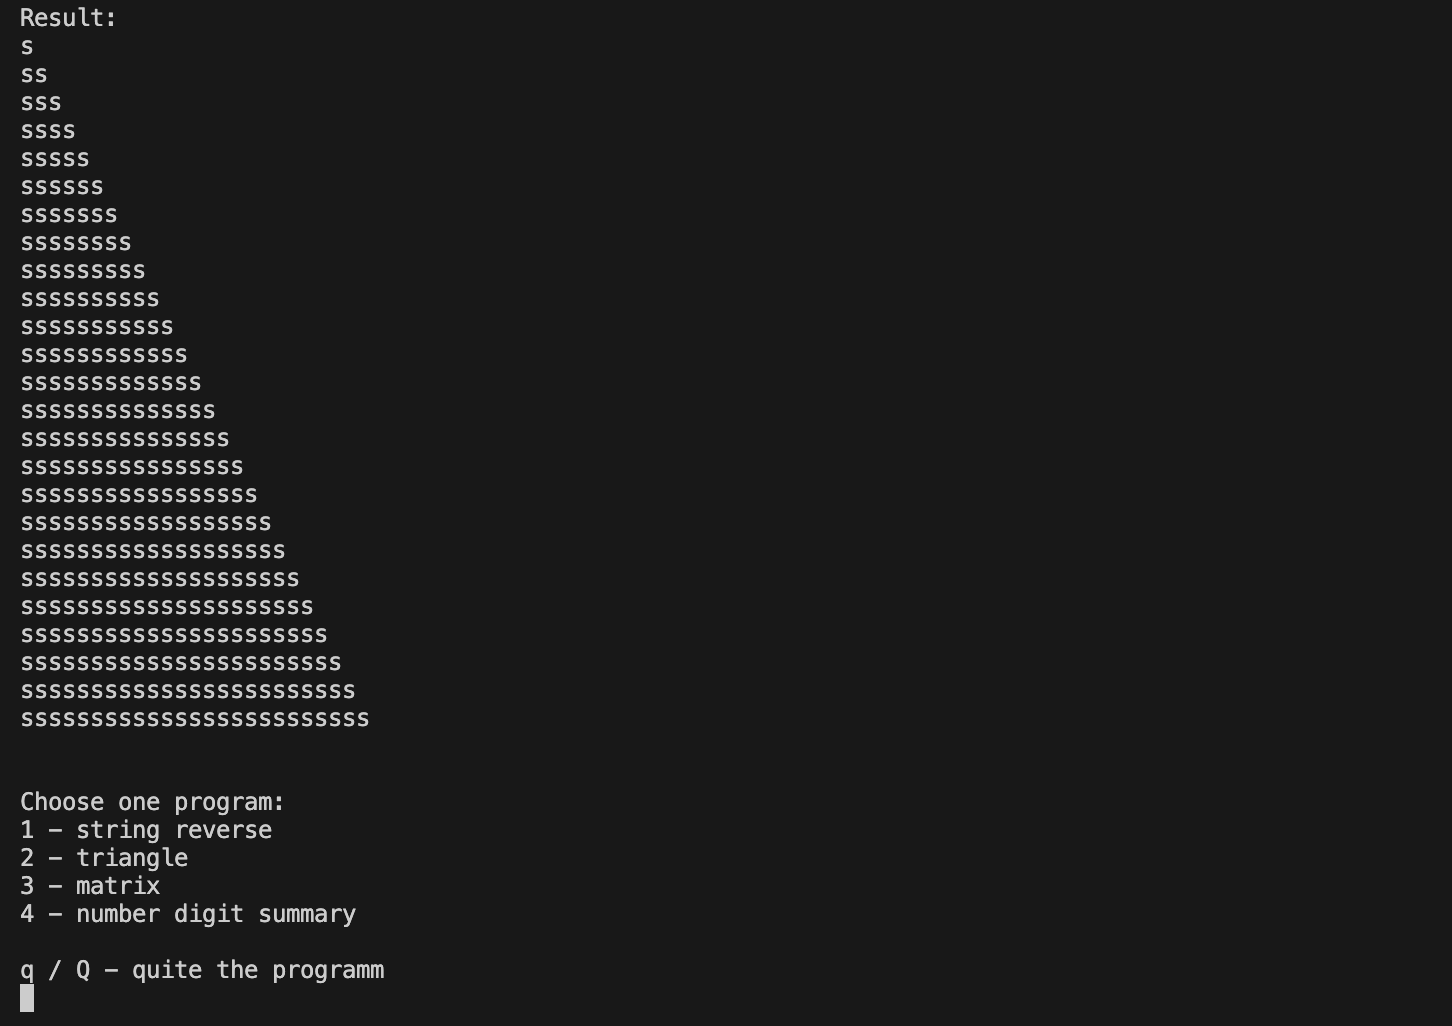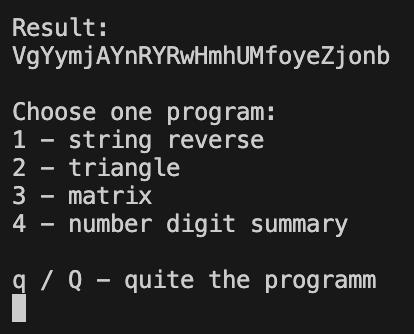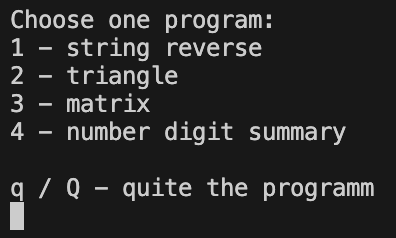

## C code test

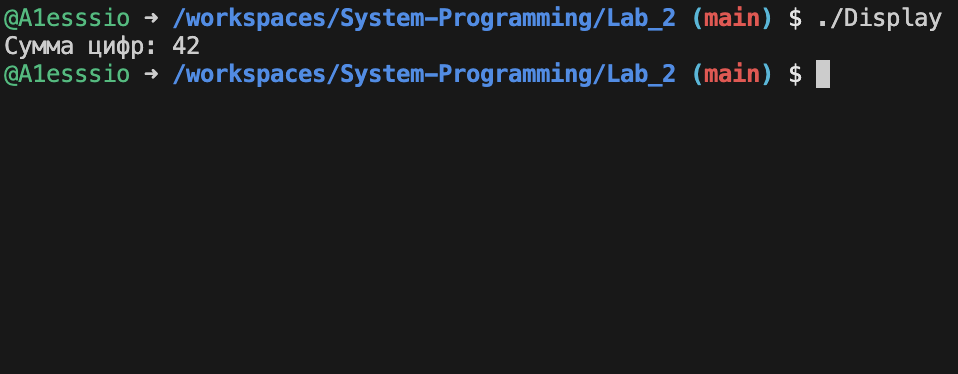

## C code

```C
#include <stdio.h>

int main(int argc, char** argv) {
    long int n = 5440848234;
    int sum = 0;
    int digit = 0;

    while (n > 0) {
        digit = n % 10;
        sum += digit;
        n /= 10;
    }
    
    printf("Сумма цифр: %d\n", sum);
    
    return 0;
}
```


## Assembler code

```ASM
format ELF

public _start

macro syscall {
    int 0x80
}

macro cout _data, _length {
    push eax
    push ebx
    push edx
    push ecx
        mov eax, 4
        mov ebx, 1
        mov ecx, _data
        mov edx, _length
        syscall
    pop ecx
    pop edx
    pop ebx
    pop eax
}

macro cin _bufferInput, _length {
    push ebx
    push edx
    push ecx
        mov eax, 3
        mov ebx, 0
        mov ecx, _bufferInput
        mov edx, _length
        syscall
    pop ecx
    pop edx
    pop ebx
}

macro clearBuffer _buffer, _lengthBuffer {
    push eax
    push ecx
    push edi
        mov edi, _buffer
        mov ecx, _lengthBuffer
        xor eax, eax
        rep stosb       ; write al in [edi], ecx times
    pop edi
    pop ecx
    pop eax
}

section '.data' writeable
    messageOptionProgram:
        db 'Choose one program:', 10
        db '1 - string reverse', 10
        db '2 - triangle', 10
        db '3 - matrix', 10
        db '4 - number digit summary', 10, 10
        db 'q / Q - quite the programm', 10
    messageOptionEnd:
    lengthMessageOptionProgram equ messageOptionEnd - messageOptionProgram

    messageInvalidOption:
        db 0x1B, '[H', 0x1B, '[J'
        db 'Error: choose between 1, 2, 3 or 4', 10, 10
    messageInvalidOptionEnd:
    lengthMessageInvalidOption equ messageInvalidOptionEnd - messageInvalidOption

    messageResult:
        db 'Result:'
    messageResultEnd:
    lengthMessageResult equ messageResultEnd - messageResult

    terminalClear db 0x1B, '[H', 0x1B, '[J'
    newLine db 10

    string:
        db 'bnojZeyofMUhmHwRYRnYAjmyYgV'
    stringEnd:
    lengthString equ stringEnd - string

    symbol db 's'
    quantitySymbol dd 325
    quantityColumn dd 13
    quantityString dd 25

    number:
        db '5440848234'
    numberEnd:
    lengthNumber equ numberEnd - number

    lengthInput dd 0
    lengthOutput dd 0

    lineNumber dd 0
    currentIndent dd 0
    charsNumber dd 0
    BufferOutputPosition dd 0

section '.bss' writeable
    bufferInput rb 256
    bufferOutput rb 256
    bufferCalculation rb 4
    bufferResult rb 4

section '.error' executable
    invalidRangeOption:
        cout messageInvalidOption, lengthMessageInvalidOption
        jmp main

section '.text' executable
_start:
    cout terminalClear, 6
main:
    cout messageOptionProgram, lengthMessageOptionProgram

    cin bufferInput, 256

    ; al - the youngest byte
    ; eax (32 bits): |00000000|00000000|00000000|00000010| (value 2)
    ; al (8 bits):                              |00000010| (same value 2)
    mov [lengthInput], eax

    cmp dword [lengthInput], 2
    jne invalidRangeOption

    mov al, [bufferInput]

    cmp al, 'q'
    je return

    cmp al, 'Q'
    je return

    cmp al, '1'
    jb invalidRangeOption

    cmp al, '4'
    ja invalidRangeOption

    cmp al, '1'
    je executionFirst

    cmp al, '2'
    je executionSecond

    cmp al, '3'
    je executionThird

    cmp al, '4'
    je executionFourth

    executionFirst:
        cout terminalClear, 6

        push ebx
        push esi
        push edi
            ; set begin and end pointers
            ; esi (Source Index)
            ; edi (Destination Index)
            mov edi, bufferOutput
            mov ebx, lengthString
            mov dword [lengthOutput], ebx
            mov esi, string
            add esi, lengthString
            dec esi

            .cycleReversion:
                mov al, byte [esi]
                mov byte [edi], al
                inc edi
                dec esi

                dec ebx
                jnz .cycleReversion
        pop edi
        pop esi
        pop ebx

            cout messageResult, lengthMessageResult
            cout newLine, 1
            cout bufferOutput, [lengthOutput]
            cout newLine, 1
            cout newLine, 1

            jmp main

    executionSecond:
        cout terminalClear, 6

        push esi
        push ebx
        push ecx
        push edi
        push eax
            ;initializing
            mov edi, bufferOutput   ; start output buffer
            mov ecx, dword [quantitySymbol]
            mov esi, 1
            .cycleLine:
                xor ebx, ebx
                .cycleColumn:
                    mov al, byte [symbol]
                    mov byte [edi], al
                    inc edi
                    dec ecx
                    inc ebx

                    cmp ebx, esi
                    jl .cycleColumn

                inc esi

                mov al, 10
                mov byte [edi], al
                inc edi

                cmp ecx, 0
                jg .cycleLine

            sub edi, bufferOutput
            mov dword [lengthOutput], edi
        pop eax
        pop edi
        pop ecx
        pop ebx
        pop esi

        cout messageResult, lengthMessageResult
        cout newLine, 1
        cout bufferOutput, [lengthOutput]
        cout newLine, 1
        cout newLine, 1

        jmp main
    
    executionThird:
        cout terminalClear, 6

        push esi
        push ebx
        push ecx
        push edi
            ;initializing
            mov esi, dword [quantityString]
            mov edi, bufferOutput   ; start output buffer
            .cycleLine:
                mov ebx, dword [quantityColumn]
                .cycleColumn:
                    mov al, byte [symbol]
                    mov byte [edi], al
                    inc edi
                    dec ebx
                    jnz .cycleColumn

                mov al, 10
                mov [edi], al
                inc edi

                dec esi
                jnz .cycleLine

            sub edi, bufferOutput
            mov dword [lengthOutput], edi
        pop edi
        pop ecx
        pop ebx
        pop esi

        cout messageResult, lengthMessageResult
        cout newLine, 1
        cout bufferOutput, dword [lengthOutput]
        cout newLine, 1
        cout newLine, 1

        jmp main
    
    executionFourth:
        cout terminalClear, 6

        clearBuffer bufferOutput, 256

        push esi
        push ebx
        push eax
        push edi
        push ecx
            mov edi, number
            mov esi, lengthNumber
            xor eax, eax
            .cycleSummary:
                add al, byte [edi]
                sub al, '0'
                inc edi
                dec esi
                jnz .cycleSummary

            push eax
                mov ebx, 10
                xor ecx, ecx
                .cycleLength:
                    xor edx, edx
                    div ebx

                    inc ecx

                    cmp eax, 0
                    jg .cycleLength
            pop eax

            mov edi, bufferOutput
            add edi, ecx
            dec edi
            .cycleCastChar:
                xor edx, edx
                div ebx

                add dl, '0'
                mov byte [edi], dl
                dec edi

                cmp eax, 0
                jg .cycleCastChar
                
            mov dword [lengthOutput], ecx
        pop ecx
        pop edi
        pop eax
        pop ebx
        pop esi

        cout messageResult, lengthMessageResult
        cout newLine, 1
        cout bufferOutput, [lengthOutput]
        cout newLine, 1
        cout newLine, 1

        jmp main

    return:
        mov eax, 1
        xor ebx, ebx
        syscall

; 31              16 15             0
; ┌───────────────┬─────────────────┐
; │               │      FLAGS      │
; └───────────────┴─────────────────┘
;                   ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑
;                   │ │ │ │ │ │ │ │
;                   │ │ │ │ │ │ │ └─ CF (бит 0)
;                   │ │ │ │ │ │ └─── PF (бит 2)  
;                   │ │ │ │ │ └───── AF (бит 4)
;                   │ │ │ │ └─────── ZF (бит 6)
;                   │ │ │ └───────── SF (бит 7)
;                   │ │ └─────────── TF (бит 8)
;                   │ └───────────── IF (бит 9)
;                   └─────────────── DF (бит 10)
```
